# Predicting Sales Prices

 ## Dataset Attributes

 The dataset contains information about houses in Ames, Iowa. The data was collected by the Ames City Assessor’s Office describing 2930 property sales which occurred in Ames, Iowa between 2006 and 2010. The dataset, containing 81 variables, was compiled and published by De Cock in 2011.

 Some of the variables contained in the original dataset have been removed from the the dataset provided to you.
 The dataset provided to you contains the following variables:
* **Year_Built:** year that the house was originally constructed
* **Year_Remod_Add:** year that the house was last remodelled
* **Total_Bsmt_SF:** total size of basement area in square feet
* **First_Flr_SF:** size of the first floor in square feet
* **Second_Flr_SF:** size of the second floor in square feet
* **Gr_Liv_Area:** size of above grade, ground living area in square feet
* **Full_Bath:** number of full above grade bathrooms in the house
* **Half_Bath:** number of half above grade bathrooms in the house
* **Bedroom_AbvGr:** number of above grade bedrooms (does not include basement bedrooms)
* **Kitchen_AbvGr:** number of above grade kitchens
* **TotRms_AbvGrd:** total number of above grade rooms (does not include bathrooms)
* **Fireplaces:** number of fireplaces in the house
* **Garage_Area:** size of garage in square feet
* **Sale_Price:** sale price of the house in dollars


*De Cock, D. (2011). "Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester
Regression Project," Journal of Statistics Education, Volume 19, Number 3.*

- https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt
- http://ww2.amstat.org/publications/jse/v19n3/decock.pdf


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the sales prices based on the 'Gr_Liv_Area' and 'Garage_Area` variables.


In [1]:
# Import libraries

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
# Read in the data set

worksheet = gc.open("ames").sheet1
from gspread_dataframe import get_as_dataframe

df = get_as_dataframe(worksheet)

In [5]:
# Clean and pre-process the data if neccessary

df = df[['Gr_Liv_Area', 'Garage_Area', 'Sale_Price']].dropna()

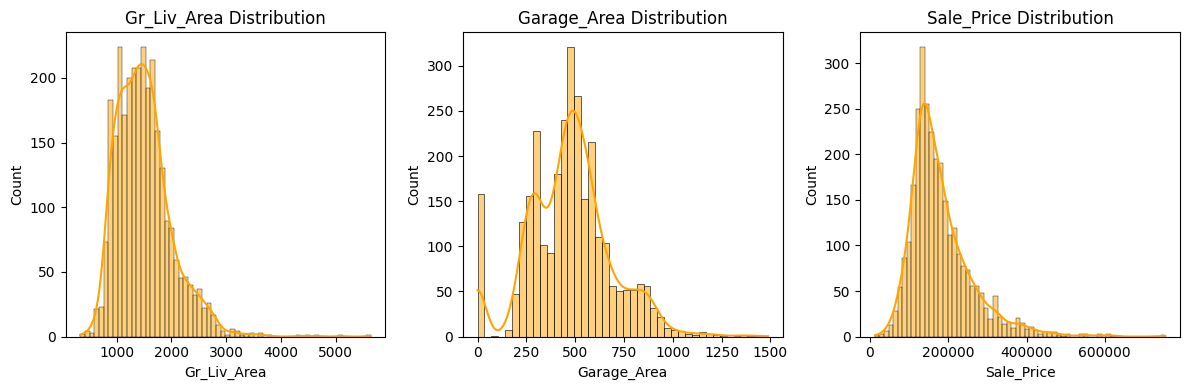

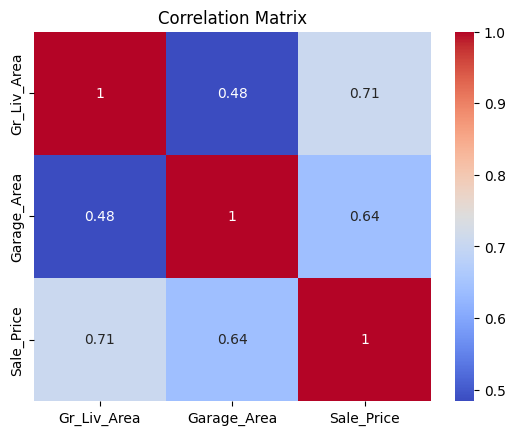

In [6]:
# Explore the data with visualisations such as histograms and correlation matrices

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(df['Gr_Liv_Area'], kde=True, color='orange')
plt.title('Gr_Liv_Area Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Garage_Area'], kde=True, color='orange')
plt.title('Garage_Area Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Sale_Price'], kde=True, color='orange')
plt.title('Sale_Price Distribution')
plt.tight_layout()
plt.show()

# Showing the Correlation Matrix

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [7]:
# Split the independent variables from the dependent variable

X = df[['Gr_Liv_Area', 'Garage_Area']]
y = df['Sale_Price']

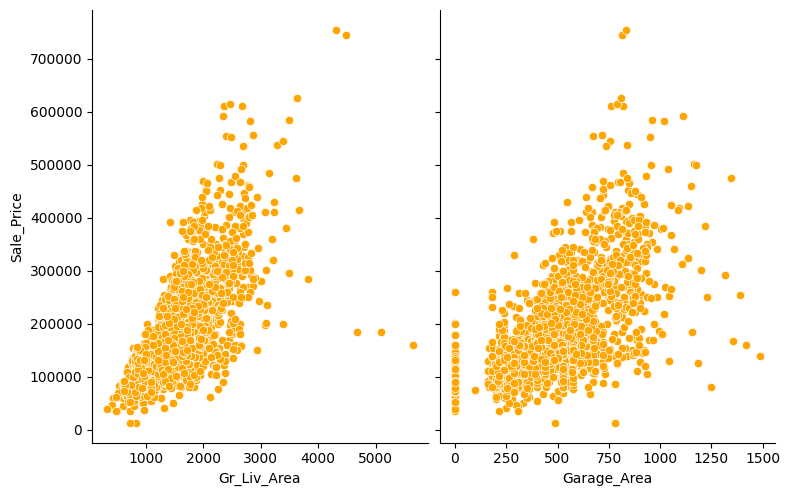

In [8]:
# Explore relationships between the independent and dependent variables

sns.pairplot(df, x_vars=['Gr_Liv_Area', 'Garage_Area'], y_vars='Sale_Price', height=5, aspect=0.8, plot_kws={'color': 'orange'})
plt.show()

In [9]:
# Create a training and test set with a 75:25 split ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
# Build a multiple linear regression model using 'Gr_Liv_Area' and 'Garage_Area'

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Print the model intercept and coefficients

print("Intercept:", model.intercept_)
for feature, coef in zip(X.columns, model.coef_):
    print(f"Coefficient for {feature}:", coef)

Intercept: -5059.448195610312
Coefficient for Gr_Liv_Area: 78.69286848121403
Coefficient for Garage_Area: 141.14571760877197


In [12]:
# Generate predictions for the test set

y_pred = model.predict(X_test)

In [14]:
# Evaluate the model

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 51326.132522236774


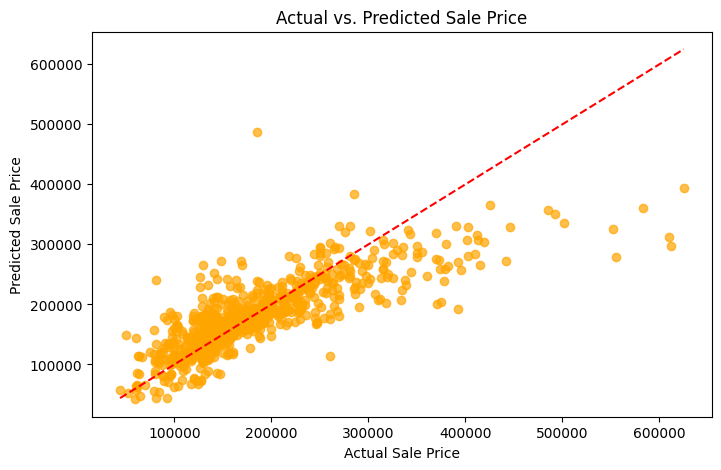

In [15]:
# Generate a plot (Actual vs Predicted)

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs. Predicted Sale Price')
plt.show()

In [16]:
# Print the coefficients

print("\nModel Summary:")
print("Intercept:", model.intercept_)
print("Coefficients:")
for name, coef in zip(X.columns, model.coef_):
    print(f"  {name}: {coef}")


Model Summary:
Intercept: -5059.448195610312
Coefficients:
  Gr_Liv_Area: 78.69286848121403
  Garage_Area: 141.14571760877197


**Interpret coefficients in the context of the prediction:**

1. Gr_Liv_Area = Approx. $78.69. By holding (Garage_Area) constant, for every additional square foot of living area, the model estimates that the Sale Price will increase by approximately $78.69

2. Garage_Area = Approx. $141.15. By holding (Gr_Liv_Area) constant, for every additional square foot of garage space, the model estimates an increase of $141.15 in Sale Price

3. Intercept = Approx. $5059. The predicted sale price when both (Gr_Liv_Area) and (Garage_Area) are $0 is approximately $5059. However, this is not practically possible because there will not be a house with no living area and garage.

**Summarise findings**

Based on the findings, the distributions of Gr_Liv_Area, Garage_Area and Sale_Price are positively skewed, with most of the homes clustered in the lower value area and only a few in the high value, which are outliers.

The correlation matrix showed that Gr_Liv_Area has a strong positive correlation with Sale_Price (r ≈ 0.71). Garage_Area also showed moderately strong positive correlation with Sale_Price (r ≈ 0.64). The scatter plots confirmend a linear relationship between each independent variable and sale price.

In terms of model performance, a multiple linear regression model was trained using Gr_Liv_Area and Garage_Area as predictors. The coefficients produced are as follows:

* Intercept ≈ $5059
* Gr_Liv_Area ≈ $78.69 per additional sq. ft
* Garage_Area ≈ $141.15 per additional sq. ft

The model achieved an RMSE of approximately $51326, showing the average prediction error in sale price.